We will use Sitemaps to understand the website's important pages.

Do important pages of a website exist in Google Index?

We can look inside the Google Search Console to get the sense of Index Coverage. We will read URL's from XML Sitemaps and load them in the pandas data frames.

In [ ]:
sitemap_url="https://www.windecor.ca/sitemap_index.xml"

from bs4 import BeautifulSoup
import requests

sitemap_index = {}

r = requests.get(sitemap_url)
xml = r.text

print (xml)

<?xml version="1.0" encoding="UTF-8"?><?xml-stylesheet type="text/xsl" href="//www.windecor.ca/wp-content/plugins/wordpress-seo/css/main-sitemap.xsl"?>
<sitemapindex xmlns="http://www.sitemaps.org/schemas/sitemap/0.9">
	<sitemap>
		<loc>https://www.windecor.ca/post-sitemap.xml</loc>
		<lastmod>2021-01-26T02:53:42+00:00</lastmod>
	</sitemap>
	<sitemap>
		<loc>https://www.windecor.ca/page-sitemap.xml</loc>
		<lastmod>2021-01-26T04:14:26+00:00</lastmod>
	</sitemap>
	<sitemap>
		<loc>https://www.windecor.ca/option-tree-sitemap.xml</loc>
	</sitemap>
	<sitemap>
		<loc>https://www.windecor.ca/gs-logo-slider-sitemap.xml</loc>
		<lastmod>2019-06-17T16:28:18+00:00</lastmod>
	</sitemap>
	<sitemap>
		<loc>https://www.windecor.ca/portfolio-sitemap.xml</loc>
		<lastmod>2021-01-13T04:13:21+00:00</lastmod>
	</sitemap>
	<sitemap>
		<loc>https://www.windecor.ca/category-sitemap.xml</loc>
		<lastmod>2021-01-26T02:53:42+00:00</lastmod>
	</sitemap>
	<sitemap>
		<loc>https://www.windecor.ca/post_tag-sitemap

The findAll method traverses the tree, starting at the given point, and finds all the Tag and NavigableString objects that match the criteria you give.

In [ ]:
soup = BeautifulSoup(xml)
sitemapTags = soup.find_all("sitemap")

In [ ]:
print("The number of sitemaps are {0}".format(len(sitemapTags)))

The number of sitemaps are 8


In [ ]:
print(sitemapTags)

[<sitemap>
<loc>https://www.windecor.ca/post-sitemap.xml</loc>
<lastmod>2021-01-26T02:53:42+00:00</lastmod>
</sitemap>, <sitemap>
<loc>https://www.windecor.ca/page-sitemap.xml</loc>
<lastmod>2021-01-26T04:14:26+00:00</lastmod>
</sitemap>, <sitemap>
<loc>https://www.windecor.ca/option-tree-sitemap.xml</loc>
</sitemap>, <sitemap>
<loc>https://www.windecor.ca/gs-logo-slider-sitemap.xml</loc>
<lastmod>2019-06-17T16:28:18+00:00</lastmod>
</sitemap>, <sitemap>
<loc>https://www.windecor.ca/portfolio-sitemap.xml</loc>
<lastmod>2021-01-13T04:13:21+00:00</lastmod>
</sitemap>, <sitemap>
<loc>https://www.windecor.ca/category-sitemap.xml</loc>
<lastmod>2021-01-26T02:53:42+00:00</lastmod>
</sitemap>, <sitemap>
<loc>https://www.windecor.ca/post_tag-sitemap.xml</loc>
<lastmod>2021-01-26T02:53:42+00:00</lastmod>
</sitemap>, <sitemap>
<loc>https://www.windecor.ca/project-type-sitemap.xml</loc>
<lastmod>2021-01-13T04:13:21+00:00</lastmod>
</sitemap>]


In [ ]:
for sitemap in sitemapTags:
  if (sitemap.find("lastmod") != None):
    sitemap_index[sitemap.find("loc").text] = sitemap.find("lastmod").text 
  else:
    sitemap_index[sitemap.find("loc").text] = "NA"
    
print(sitemap_index)

{'https://www.windecor.ca/post-sitemap.xml': '2021-01-26T02:53:42+00:00', 'https://www.windecor.ca/page-sitemap.xml': '2021-01-26T04:14:26+00:00', 'https://www.windecor.ca/option-tree-sitemap.xml': 'NA', 'https://www.windecor.ca/gs-logo-slider-sitemap.xml': '2019-06-17T16:28:18+00:00', 'https://www.windecor.ca/portfolio-sitemap.xml': '2021-01-13T04:13:21+00:00', 'https://www.windecor.ca/category-sitemap.xml': '2021-01-26T02:53:42+00:00', 'https://www.windecor.ca/post_tag-sitemap.xml': '2021-01-26T02:53:42+00:00', 'https://www.windecor.ca/project-type-sitemap.xml': '2021-01-13T04:13:21+00:00'}


Do Ternary Operator Assignment - The syntax for the ternary operator in Python is:

[on_true] if [expression] else [on_false]

In [ ]:
#smap_index = {}

#for each_map in sitemapTags:
#  smap_index[each_map.find("loc").text] = each_map.find("lastmod").text if (each_map.find("lastmod") != None) else 'NA'

#print(smap_index)


Let's try to pull the actual website URLs from xml

We will first try - https://www.windecor.ca/post-sitemap.xml

In [ ]:
sitemap_post_urls = {}

for (sitemap_url, lasmod) in sitemap_index.items():
  if(sitemap_url.find("post-sitemap") > 0):
    #print(sitemap_url)
    r = requests.get(sitemap_url)
    xml = r.text
    #print(xml)
    
    soup = BeautifulSoup(xml)
    URLTags = soup.find_all("url")
    print("The number of URLs are {0}".format(len(URLTags)))

    for each_URL in URLTags:
      sitemap_post_urls[each_URL.find("loc").text] = each_URL.find("lastmod").text if (each_URL.find("lastmod") != None) else 'NA'

    print(sitemap_post_urls)

The number of URLs are 13
{'https://www.windecor.ca/blog/': '2021-01-26T02:53:42+00:00', 'https://www.windecor.ca/faux-wood-vs-real-wood-blinds/': '2018-10-19T01:34:24+00:00', 'https://www.windecor.ca/dual-roller-shades-new-style/': '2018-10-28T21:08:08+00:00', 'https://www.windecor.ca/dual-shades-room-darkening-shade/': '2018-10-28T21:08:40+00:00', 'https://www.windecor.ca/styles-of-shade-elegant-easy-pocketbook-part-1/': '2018-10-28T21:08:58+00:00', 'https://www.windecor.ca/blinds-and-shades-element-of-decoration/': '2018-10-28T21:09:24+00:00', 'https://www.windecor.ca/top-down-bottom-up-blinds/': '2019-01-17T04:10:05+00:00', 'https://www.windecor.ca/get-window-blinds-shades-like-show-homes/': '2019-02-03T20:14:42+00:00', 'https://www.windecor.ca/3-bedroom-blinds-ideas/': '2019-02-03T20:27:30+00:00', 'https://www.windecor.ca/banded-sheer-roller-shades-check-these-3-facts-before-you-buy/': '2020-03-23T18:29:00+00:00', 'https://www.windecor.ca/are-zebra-blinds-good-for-calgary-homes/':

We can load them into a pandas data frame.

Construct DataFrame from dict of array-like or dicts.

Creates DataFrame object from dictionary by columns or by index

In [ ]:
import pandas as pd
print(pd.__version__) #should be 0.23 or later
df = pd.DataFrame.from_dict(sitemap_post_urls, orient="index", columns=['lastmod'])
df.head(5)

1.1.5


,lastmod
https://www.windecor.ca/blog/,2021-01-26T02:53:42+00:00
https://www.windecor.ca/faux-wood-vs-real-wood-blinds/,2018-10-19T01:34:24+00:00
https://www.windecor.ca/dual-roller-shades-new-style/,2018-10-28T21:08:08+00:00
https://www.windecor.ca/dual-shades-room-darkening-shade/,2018-10-28T21:08:40+00:00
https://www.windecor.ca/styles-of-shade-elegant-easy-pocketbook-part-1/,2018-10-28T21:08:58+00:00


Lets find the most popular words that appear in the slugs. We can create a Word Cloud.

A word cloud is just the most popular words ordered by their frequency. We eliminate common words like “the”, “a”, etc. to have a clean group.

Create a new column with only the paths of the URLs

In [ ]:
from urllib.parse import urlparse

df["path"]=df.index.map(lambda x: urlparse(x).path)

df.head(5)

,lastmod,path
https://www.windecor.ca/blog/,2021-01-26T02:53:42+00:00,/blog/
https://www.windecor.ca/faux-wood-vs-real-wood-blinds/,2018-10-19T01:34:24+00:00,/faux-wood-vs-real-wood-blinds/
https://www.windecor.ca/dual-roller-shades-new-style/,2018-10-28T21:08:08+00:00,/dual-roller-shades-new-style/
https://www.windecor.ca/dual-shades-room-darkening-shade/,2018-10-28T21:08:40+00:00,/dual-shades-room-darkening-shade/
https://www.windecor.ca/styles-of-shade-elegant-easy-pocketbook-part-1/,2018-10-28T21:08:58+00:00,/styles-of-shade-elegant-easy-pocketbook-part-1/
https://www.windecor.ca/blinds-and-shades-element-of-decoration/,2018-10-28T21:09:24+00:00,/blinds-and-shades-element-of-decoration/
https://www.windecor.ca/top-down-bottom-up-blinds/,2019-01-17T04:10:05+00:00,/top-down-bottom-up-blinds/
https://www.windecor.ca/get-window-blinds-shades-like-show-homes/,2019-02-03T20:14:42+00:00,/get-window-blinds-shades-like-show-homes/
https://www.windecor.ca/3-bedroom-blinds-ideas/,2019-02-03T20:27:30+00:00,/3-bedroom-blinds-ideas/
https://www.windecor.ca/banded-sheer-roller-shades-check-these-3-facts-before-you-buy/,2020-03-23T18:29:00+00:00,/banded-sheer-roller-shades-check-these-3-fact...


Download English stopwords from the Nltk package.

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

We will get into String manipulation and use collections.Counter([iterable-or-mapping])

A Counter is a dict subclass for counting hashable objects. It is a collection where elements are stored as dictionary keys and their counts are stored as dictionary values. Counts are allowed to be any integer value including zero or negative counts.
Elements are counted from an iterable or initialized from another mapping (or counter):

First take only the path portion of the URLs, 
break the words by using – or / as separators, and count the word frequency. 

When counting, we exclude stop words and words that are only digits.

In [ ]:
from collections import Counter
import re

cnt=Counter()
english_stopwords = set(stopwords.words('english'))

for path in df.path:
  words = re.split("[-/]", path)
  for word in words:
    if len(word) > 0 and word not in english_stopwords and not word.isdigit():
      cnt[word] += 1

cnt.most_common(10)

[('blinds', 8),
 ('shades', 5),
 ('wood', 2),
 ('dual', 2),
 ('roller', 2),
 ('shade', 2),
 ('part', 2),
 ('homes', 2),
 ('blog', 1),
 ('faux', 1),
 ('vs', 1),
 ('real', 1),
 ('new', 1),
 ('style', 1),
 ('room', 1),
 ('darkening', 1),
 ('styles', 1),
 ('elegant', 1),
 ('easy', 1),
 ('pocketbook', 1),
 ('element', 1),
 ('decoration', 1),
 ('top', 1),
 ('bottom', 1),
 ('get', 1)]

We can create a visual word cloud with the word frequencies above

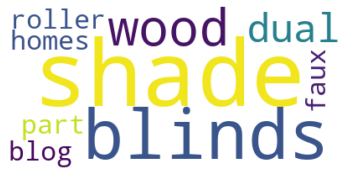

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

word_cloud = [x[0] for x in cnt.most_common(10)]

word_cloud_obj = WordCloud(max_words=10, background_color="white").generate(" ".join(word_cloud))

#word_cloud_obj = WordCloud().generate(" ".join(word_cloud)) #default with ugly black background

plt.imshow(word_cloud_obj, interpolation='bilinear')
plt.axis("off")
plt.show()

We can add the wordcloud column as a category to the data frame with the sitemap URLs.

In [ ]:
def get_category(path):
  result = []
  words = re.split("[-/]", path)
  
  for word in words:
    if word in word_cloud:
      if word not in result:
        result.append(word)

  if len(result) == 0:
    return 'other'
  
  return ', '.join(result)
  

#test = get_category('5 ways to do X')
#print(test)
df['category']=df.path.apply(get_category)

df.head(13)

,lastmod,path,category
https://www.windecor.ca/blog/,2021-01-26T02:53:42+00:00,/blog/,blog
https://www.windecor.ca/faux-wood-vs-real-wood-blinds/,2018-10-19T01:34:24+00:00,/faux-wood-vs-real-wood-blinds/,"faux, wood, blinds"
https://www.windecor.ca/dual-roller-shades-new-style/,2018-10-28T21:08:08+00:00,/dual-roller-shades-new-style/,"dual, roller, shades"
https://www.windecor.ca/dual-shades-room-darkening-shade/,2018-10-28T21:08:40+00:00,/dual-shades-room-darkening-shade/,"dual, shades, shade"
https://www.windecor.ca/styles-of-shade-elegant-easy-pocketbook-part-1/,2018-10-28T21:08:58+00:00,/styles-of-shade-elegant-easy-pocketbook-part-1/,"shade, part"
https://www.windecor.ca/blinds-and-shades-element-of-decoration/,2018-10-28T21:09:24+00:00,/blinds-and-shades-element-of-decoration/,"blinds, shades"
https://www.windecor.ca/top-down-bottom-up-blinds/,2019-01-17T04:10:05+00:00,/top-down-bottom-up-blinds/,blinds
https://www.windecor.ca/get-window-blinds-shades-like-show-homes/,2019-02-03T20:14:42+00:00,/get-window-blinds-shades-like-show-homes/,"blinds, shades, homes"
https://www.windecor.ca/3-bedroom-blinds-ideas/,2019-02-03T20:27:30+00:00,/3-bedroom-blinds-ideas/,blinds
https://www.windecor.ca/banded-sheer-roller-shades-check-these-3-facts-before-you-buy/,2020-03-23T18:29:00+00:00,/banded-sheer-roller-shades-check-these-3-fact...,"roller, shades"


Nacho Mascort
NachoSEO

https://github.com/NachoSEO/extract_urls_from_sitemap_index

extract_urls_from_sitemap_index

Scrape all the URLs from a sitemap index or a sitemap.xml. The parameter is the URL of the sitemap_index. Only works with XML format. The script will output an excel with three columns:


*   ID
*   Sitemap: in which sitemap was found the url
*   Url: A list of all the urls that appears in the sitemap(s)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/SitemapsAnalysis/urls-sitemap.csv'

In [52]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def extract_urls_from_sitemap(url_sitemap):
    sitemap = []
    urls = []
    sitemap_crawled = []
    xml = requests.get(url_sitemap)
    xml_parsed = BeautifulSoup(xml.content, "xml")
    if xml_parsed.find_all("sitemap"):
        sitemaps = xml_parsed.find_all("loc")
        for s in sitemaps:
            sitemap.append(s.text)
        for s in sitemap:
            uis = requests.get(s)
            uis_parsed = BeautifulSoup(uis.content, "xml")
            urls_loc1 = uis_parsed.find_all("loc")
            for u in urls_loc1:
                urls.append(u.text)
                sitemap_crawled.append(s)
    else:
        url = xml_parsed.find_all("loc")
        for u in url:
            urls.append(u.text)
            sitemap_crawled.append(url_sitemap)
    return urls, sitemap_crawled

#urls,sitemap_crawled = extract_urls_from_sitemap("URL-HERE")

urls,sitemap_crawled = extract_urls_from_sitemap('https://www.windecor.ca/post-sitemap.xml')

df = pd.DataFrame({
    "urls":urls,
    "sitemap":sitemap_crawled
})
df.to_csv(file_path, sep="\t", encoding="utf-8")
print('Done')

Done
